In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

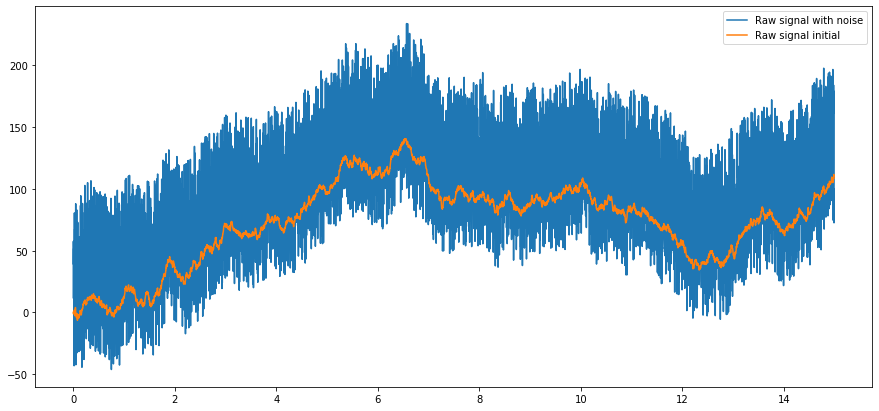

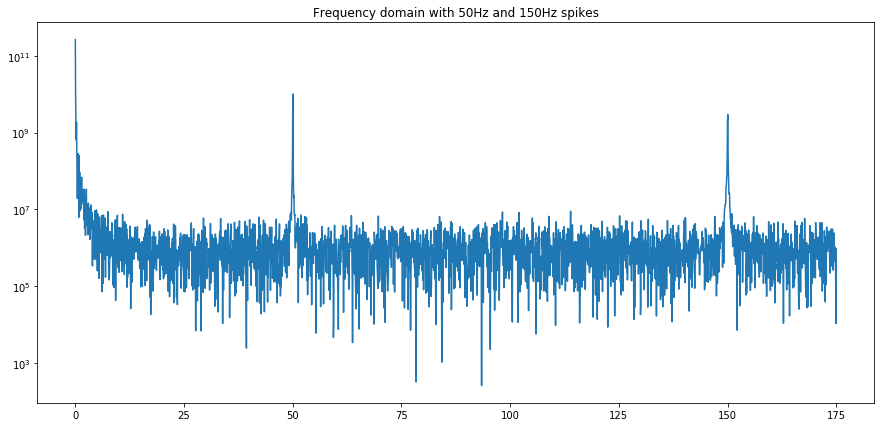

In [35]:
# Generating data
sample_frequency = 350
nyquist_frequency = sample_frequency / 2
time_axis = np.arange(0, sample_frequency * 15 - 1) / sample_frequency
n_signal = len(time_axis)

raw_signal_initial = np.cumsum(np.random.randn(n_signal))
# add noise with 50 HZ spike 
raw_signal = raw_signal_initial + 50 * np.random.rand(n_signal) + 40 * np.sin(2 * np.pi * 50 * time_axis)
# 150 HZ spike 
raw_signal += 30 * np.sin(2 * np.pi * 150 * time_axis)
plt.figure(figsize=(15, 7))
plt.plot(time_axis, raw_signal, label='Raw signal with noise')
plt.plot(time_axis, raw_signal_initial, label='Raw signal initial')
plt.legend()
plt.show()

raw_signal_power = abs(np.fft.fft(raw_signal)) ** 2
hz_axis = np.linspace(0, nyquist_frequency, int(np.floor(n_signal / 2) + 1))

plt.figure(figsize=(15, 7))
plt.plot(hz_axis, raw_signal_power[:len(hz_axis)])
plt.yscale('log')
plt.title('Raw signal Frequency domain with 50Hz and 150Hz spikes')
plt.show()


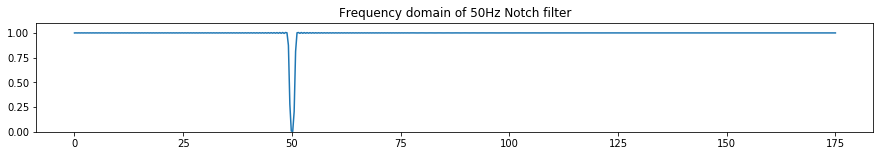

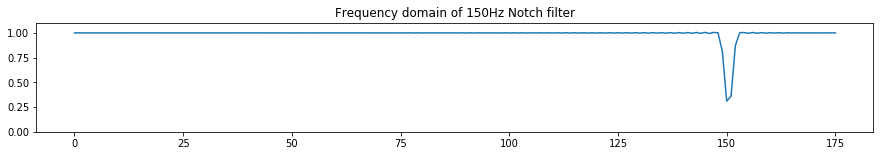

In [37]:
cutoff_frequencies = [50, 150]

filtered_signal = raw_signal

for i in range(len(cutoff_frequencies)):
    filter_range = [cutoff_frequencies[i] - 0.5, cutoff_frequencies[i] + 0.5]
    # Order is different each time, the higher the frequency the smaller is the order
    filter_order = round(150 * sample_frequency / filter_range[0])
    filtering_kernel = signal.firwin(filter_order, filter_range, fs=sample_frequency, pass_zero=True)

    hz_filter = np.linspace(0, nyquist_frequency, int(np.floor(len(filtering_kernel) / 2) + 1))
    filtering_kernel_power = abs(np.fft.fft(filtering_kernel)) ** 2

    plt.figure(figsize=(15, 2))
    plt.plot(hz_filter, filtering_kernel_power[:len(hz_filter)])
    plt.ylim([0, 1.1]),
    plt.title('Frequency domain of {0}Hz Notch filter'.format(cutoff_frequencies[i]))
    plt.show()

    filtered_signal = signal.filtfilt(filtering_kernel, 1, filtered_signal)


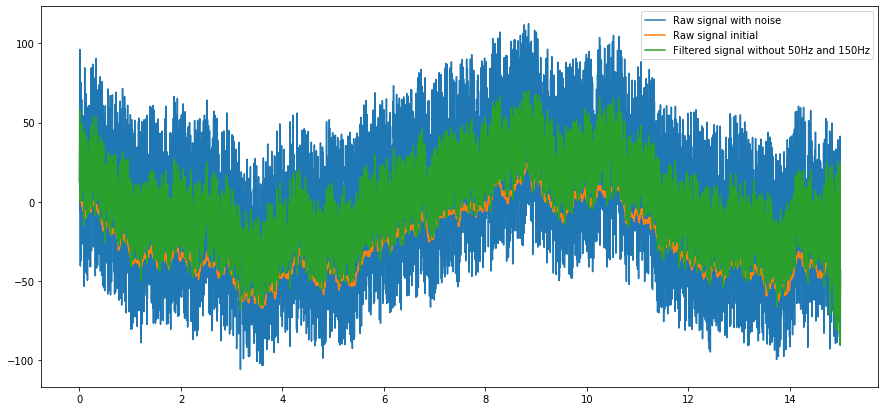

In [33]:
plt.figure(figsize=(15, 7))
plt.plot(time_axis, raw_signal, label='Raw signal with noise')
plt.plot(time_axis, raw_signal_initial, label='Raw signal initial')
plt.plot(time_axis, filtered_signal, label='Filtered signal without 50Hz and 150Hz')
plt.legend()
plt.show()
